**Project description**
You've done beautifully in the TripleTen course, and you've been offered an internship in the analytical department at Y.Afisha. Your first task is to help optimize marketing expenses. 

You have:

>1)Server logs with data on Y.Afisha visits from June 2017 through May 2018

>2)Dump file with all orders for the period

>3)Marketing expenses statistics

You are going to study: 

>1)How people use the product

>2)When they start to buy

>3)How much money each customer brings

>4)When they pay off

<a id="0"></a> <br>
 # Table of Contents     
1. [Initialization](#7)      
    1. [Load data](#12)       
    1. [Explore initial data and information](#12)   
    1. [Fix missing data and enrich data](#12)   
1. [Data analysis](#12)     
1. [General conclusion](#12)   

## Initialization

In [2]:
## Initialization# Loading all the libraries

import pandas as pd
import numpy as np
import math as mt
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
from scipy import stats
from scipy.stats import ttest_ind

### Load data

In [3]:
### Load data# Load the data files into different DataFrames

visits = pd.read_csv('/datasets/visits_log_us.csv')
orders = pd.read_csv('/datasets/orders_log_us.csv')
costs = pd.read_csv('/datasets/costs_us.csv')

### Explore initial data and information

In [4]:
### Explore initial data and information# Print the general/summary information about the plans' DataFrame
visits.info()
print()
print()
orders.info()
print()
print()
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----

In [5]:
visits.head(5)

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [6]:
orders.head(5)

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [7]:
costs.head(5)

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


### Fix missing data and enrich data

In [8]:
### Fix missing data and enrich data# Identify missing values
missing_values = visits.isnull()

# Count missing values in each column
missing_counts = missing_values.sum()

# Display missing value counts
print("Missing value counts in each column:")
print(missing_counts)

Missing value counts in each column:
Device       0
End Ts       0
Source Id    0
Start Ts     0
Uid          0
dtype: int64


In [9]:
# Identify missing values
missing_values = orders.isnull()

# Count missing values in each column
missing_counts = missing_values.sum()

# Display missing value counts
print("Missing value counts in each column:")
print(missing_counts)

Missing value counts in each column:
Buy Ts     0
Revenue    0
Uid        0
dtype: int64


In [10]:
# Identify missing values
missing_values = costs.isnull()

# Count missing values in each column
missing_counts = missing_values.sum()

# Display missing value counts
print("Missing value counts in each column:")
print(missing_counts)

Missing value counts in each column:
source_id    0
dt           0
costs        0
dtype: int64


## Data Analysis

Step 2. Make reports and calculate metrics:

Product (visits)
 
How many people use it every day, week, and month?

In [11]:

# Convert 'End Ts' and 'Start Ts' columns to datetime format
visits['End Ts'] = pd.to_datetime(visits['End Ts'])
visits['Start Ts'] = pd.to_datetime(visits['Start Ts'])

# Extract date and week from 'End Ts' for grouping
visits['Date'] = visits['End Ts'].dt.date
visits['Week'] = visits['End Ts'].dt.isocalendar().week

# Calculate DAU (Daily Active Users)
dau = visits['Uid'].nunique()

# Calculate WAU (Weekly Active Users)
wau = visits.groupby('Week')['Uid'].nunique().mean()

# Calculate MAU (Monthly Active Users)
mau = visits.groupby(visits['End Ts'].dt.month)['Uid'].nunique().mean()

print(f"DAU: {dau}")
print(f"WAU: {wau}")
print(f"MAU: {mau}")



DAU: 228169
WAU: 5825.038461538462
MAU: 23228.166666666668


How many sessions are there per day? (One user might have more than one session.)

In [12]:

# Convert 'End Ts' and 'Start Ts' columns to datetime format
visits['End Ts'] = pd.to_datetime(visits['End Ts'])
visits['Start Ts'] = pd.to_datetime(visits['Start Ts'])

# Extract date from 'End Ts' for grouping
visits['Date'] = visits['End Ts'].dt.date

# Count the number of sessions per day
sessions_per_day = visits.groupby('Date')['Uid'].count()

# Print the result
display(sessions_per_day)


Date
2017-06-01     659
2017-06-02     660
2017-06-03     477
2017-06-04     505
2017-06-05     893
              ... 
2018-05-28    1150
2018-05-29    1040
2018-05-30    1403
2018-05-31    2256
2018-06-01      12
Name: Uid, Length: 365, dtype: int64

What is the length of each session?

In [13]:

# Convert 'End Ts' and 'Start Ts' columns to datetime format
visits['End Ts'] = pd.to_datetime(visits['End Ts'])
visits['Start Ts'] = pd.to_datetime(visits['Start Ts'])

# Calculate the length of each session
visits['Session Length'] = (visits['End Ts'] - visits['Start Ts']).dt.total_seconds() / 60  # convert seconds to minutes

# Print the result
print(visits[['Start Ts', 'End Ts', 'Session Length']])


                  Start Ts              End Ts  Session Length
0      2017-12-20 17:20:00 2017-12-20 17:38:00       18.000000
1      2018-02-19 16:53:00 2018-02-19 17:21:00       28.000000
2      2017-07-01 01:54:00 2017-07-01 01:54:00        0.000000
3      2018-05-20 10:59:00 2018-05-20 11:23:00       24.000000
4      2017-12-27 14:06:00 2017-12-27 14:06:00        0.000000
...                    ...                 ...             ...
359395 2017-07-29 19:07:00 2017-07-29 19:07:19        0.316667
359396 2018-01-25 17:38:00 2018-01-25 17:38:19        0.316667
359397 2018-03-03 10:12:00 2018-03-03 10:12:19        0.316667
359398 2017-11-02 10:12:00 2017-11-02 10:12:19        0.316667
359399 2017-09-10 13:13:00 2017-09-10 13:13:19        0.316667

[359400 rows x 3 columns]


What's the user retention rate?

In [14]:
# Convert 'End Ts' and 'Start Ts' columns to datetime format
visits['End Ts'] = pd.to_datetime(visits['End Ts'])
visits['Start Ts'] = pd.to_datetime(visits['Start Ts'])

# Extract date from 'End Ts' for grouping
visits['Date'] = visits['End Ts'].dt.date

# Identify the initial date of each user
initial_date_per_user = visits.groupby('Uid')['Date'].min().reset_index()
initial_date_per_user = initial_date_per_user.rename(columns={'Date': 'Initial Date'})

# Merge the initial date with the original visits dataset
visits = pd.merge(visits, initial_date_per_user, on='Uid', how='left')

# Calculate the retention rate
visits['Days Since Initial'] = (visits['Date'] - visits['Initial Date']).dt.days
retention_rate = visits.groupby('Days Since Initial')['Uid'].nunique() / visits.groupby('Days Since Initial')['Uid'].nunique().max()

# Print the result
print(retention_rate)



Days Since Initial
0      1.000000
1      0.025678
2      0.013262
3      0.009660
4      0.008770
         ...   
360    0.000061
361    0.000083
362    0.000083
363    0.000096
364    0.000053
Name: Uid, Length: 365, dtype: float64


Sales (orders)
 
When do people start buying? (In KPI analysis, we're usually interested in knowing the time that elapses between registration and conversion — when the user becomes a customer.

For example, if registration and the first purchase occur on the same day, the user might fall into category Conversion 0d. If the first purchase happens the next day, it will be Conversion 1d. You can use any approach that lets you compare the conversions of different cohorts, so that you can determine which cohort, or marketing channel, is most effective.)

In [15]:

# Step 1: Convert 'Buy Ts' to datetime
orders['Buy Ts'] = pd.to_datetime(orders['Buy Ts'])

# Step 2: Sort DataFrame by 'Uid' and 'Buy Ts'
orders.sort_values(by=['Uid', 'Buy Ts'], inplace=True)

# Step 3: Calculate Time Between Registration and Conversion
# Assuming the first purchase represents registration
orders['Time to Conversion'] = orders.groupby('Uid')['Buy Ts'].diff().dt.days.fillna(0)

# Step 4: Categorize Conversions
bins = [-1, 0, 1, 2, 3, 7, 14, 30, 60, 90, 180, 365, float('inf')]
labels = ['Conversion 0d', 'Conversion 1d', 'Conversion 2d', 'Conversion 3d', 
          'Conversion 1w', 'Conversion 2w', 'Conversion 1m', 'Conversion 2m', 
          'Conversion 3m', 'Conversion 6m', 'Conversion 1y', 'Conversion >1y']

orders['Conversion Category'] = pd.cut(orders['Time to Conversion'], bins=bins, labels=labels)

display(orders[['Buy Ts', 'Time to Conversion', 'Conversion Category']])


,Buy Ts,Time to Conversion,Conversion Category
27944,2018-01-03 21:51:00,0.0,Conversion 0d
213,2017-06-03 10:13:00,0.0,Conversion 0d
252,2017-06-03 17:39:00,0.0,Conversion 0d
12235,2017-10-11 18:33:00,0.0,Conversion 0d
31462,2018-01-28 15:54:00,0.0,Conversion 0d
...,...,...,...
8919,2017-09-24 23:48:00,1.0,Conversion 1d
9023,2017-09-25 15:56:00,0.0,Conversion 0d
42213,2018-03-26 22:54:00,0.0,Conversion 0d
35572,2018-02-18 19:34:00,0.0,Conversion 0d


How many orders do they make during a given period of time?

In [16]:
orders['Buy Ts'] = pd.to_datetime(orders['Buy Ts'])

# Assuming you want to analyze order frequency per day
orders['Order Date'] = orders['Buy Ts'].dt.date

# Count the number of orders per day
orders_per_day = orders.groupby('Order Date').size().reset_index(name='Number of Orders')

# Display the result
print(orders_per_day)

     Order Date  Number of Orders
0    2017-06-01                96
1    2017-06-02               111
2    2017-06-03                67
3    2017-06-04                66
4    2017-06-05               161
..          ...               ...
359  2018-05-28               188
360  2018-05-29               189
361  2018-05-30               208
362  2018-05-31               610
363  2018-06-01                 1

[364 rows x 2 columns]


What is the average purchase size?


In [17]:
# Calculate the average purchase size
average_purchase_size = orders['Revenue'].mean()

# Display the result
print(f"The average purchase size is: ${average_purchase_size:.2f}")

The average purchase size is: $5.00


How much money do they bring? (LTV)

In [18]:
# Calculate the total revenue per customer (LTV)
ltv_per_customer = orders.groupby('Uid')['Revenue'].sum().reset_index(name='Total Revenue')

# Calculate the overall Customer Lifetime Value (LTV)
overall_ltv = ltv_per_customer['Total Revenue'].sum()

# Display the result
print(f"The overall Customer Lifetime Value (LTV) is: ${overall_ltv:.2f}")

The overall Customer Lifetime Value (LTV) is: $252057.20


Marketing (cost)
 
How much money was spent? Overall/per source/over time

In [19]:

# Assuming you have 'costs' DataFrame with columns 'source_id', 'dt', and 'costs'
# Convert 'dt' to datetime
costs['dt'] = pd.to_datetime(costs['dt'])

# Calculate total expenses overall
total_expenses_overall = costs['costs'].sum()

# Calculate total expenses per source
total_expenses_per_source = costs.groupby('source_id')['costs'].sum().reset_index(name='Total Expenses Per Source')

# Calculate total expenses over time
total_expenses_over_time = costs.groupby('dt')['costs'].sum().reset_index(name='Total Expenses Over Time')

# Display the results
print(f"Total Expenses Overall: ${total_expenses_overall:.2f}")

print("\nTotal Expenses Per Source:")
display(total_expenses_per_source)

print("\nTotal Expenses Over Time:")
display(total_expenses_over_time)


Total Expenses Overall: $329131.62

Total Expenses Per Source:


,source_id,Total Expenses Per Source
0,1,20833.27
1,2,42806.04
2,3,141321.63
3,4,61073.60
4,5,51757.10
5,9,5517.49
6,10,5822.49



Total Expenses Over Time:


,dt,Total Expenses Over Time
0,2017-06-01,735.26
1,2017-06-02,721.19
2,2017-06-03,450.85
3,2017-06-04,761.16
4,2017-06-05,821.44
...,...,...
359,2018-05-27,532.87
360,2018-05-28,619.44
361,2018-05-29,784.79
362,2018-05-30,1183.00


How much did customer acquisition from each of the sources cost?

In [20]:

orders['order_month'] = orders['Buy Ts'].astype('datetime64[M]')
costs['month'] = costs['dt'].astype('datetime64[M]')
first_orders = orders.groupby('Uid').agg({'order_month': 'min'}).reset_index()
first_orders.columns = ['Uid', 'first_order_month']
first_orders.head()


,Uid,first_order_month
0,313578113262317,2018-01-01
1,1575281904278712,2017-06-01
2,2429014661409475,2017-10-01
3,2464366381792757,2018-01-01
4,2551852515556206,2017-11-01


In [21]:
# Calculate cohort sizes
cohort_sizes = first_orders.groupby('first_order_month').agg({'Uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month', 'n_buyers']
cohort_sizes.head()

,first_order_month,n_buyers
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340


In [22]:
orders_ = pd.merge(orders,first_orders, on='Uid')
orders_.head()

,Buy Ts,Revenue,Uid,Time to Conversion,Conversion Category,Order Date,order_month,first_order_month
0,2018-01-03 21:51:00,0.55,313578113262317,0.0,Conversion 0d,2018-01-03,2018-01-01,2018-01-01
1,2017-06-03 10:13:00,1.22,1575281904278712,0.0,Conversion 0d,2017-06-03,2017-06-01,2017-06-01
2,2017-06-03 17:39:00,1.83,1575281904278712,0.0,Conversion 0d,2017-06-03,2017-06-01,2017-06-01
3,2017-10-11 18:33:00,73.33,2429014661409475,0.0,Conversion 0d,2017-10-11,2017-10-01,2017-10-01
4,2018-01-28 15:54:00,2.44,2464366381792757,0.0,Conversion 0d,2018-01-28,2018-01-01,2018-01-01


In [23]:
cohorts = orders_.groupby(['first_order_month','order_month']).agg({'Revenue': 'sum'}).reset_index()
cohorts.head() 

,first_order_month,order_month,Revenue
0,2017-06-01,2017-06-01,9557.49
1,2017-06-01,2017-07-01,981.82
2,2017-06-01,2017-08-01,885.34
3,2017-06-01,2017-09-01,1931.30
4,2017-06-01,2017-10-01,2068.58


In [24]:
report = pd.merge(cohort_sizes, cohorts, on='first_order_month')
report.head()

,first_order_month,n_buyers,order_month,Revenue
0,2017-06-01,2023,2017-06-01,9557.49
1,2017-06-01,2023,2017-07-01,981.82
2,2017-06-01,2023,2017-08-01,885.34
3,2017-06-01,2023,2017-09-01,1931.30
4,2017-06-01,2023,2017-10-01,2068.58


In [25]:
margin_rate = 0.5

report['gp'] = report['Revenue'] * margin_rate
report['age'] = (
    report['order_month'] - report['first_order_month']
) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')

report.head() 

,first_order_month,n_buyers,order_month,Revenue,gp,age
0,2017-06-01,2023,2017-06-01,9557.49,4778.745,0
1,2017-06-01,2023,2017-07-01,981.82,490.910,1
2,2017-06-01,2023,2017-08-01,885.34,442.670,2
3,2017-06-01,2023,2017-09-01,1931.30,965.650,3
4,2017-06-01,2023,2017-10-01,2068.58,1034.290,4


In [26]:
report['ltv'] = report['gp'] / report['n_buyers']

output = report.pivot_table(
    index='first_order_month', columns='age', values='ltv', aggfunc='mean'
).round()

output.fillna('') 

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-07-01,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,
2017-08-01,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,,
2017-09-01,3.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,,,
2017-10-01,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,,,,
2017-11-01,3.0,0.0,0.0,0.0,0.0,0.0,0.0,,,,,
2017-12-01,2.0,0.0,0.0,1.0,0.0,0.0,,,,,,
2018-01-01,2.0,0.0,0.0,0.0,0.0,,,,,,,
2018-02-01,2.0,0.0,0.0,0.0,,,,,,,,


In [27]:
ltv_201706 = output.loc['2017-06-01'].sum()
ltv_201706 

3.0

In [28]:
# getting the necessary cohort
cohort_201706 = report[report['first_order_month'] == '2017-06-01']

# calculating costs for the cohort month
costs_201706 = costs[costs['month'] == '2017-06-01']['costs'].sum()

n_buyers_201706 = cohort_201706['n_buyers'][0]
cac_201706 = costs_201706 / n_buyers_201706


# Calculate LTV for the cohort
cohort_201706 = cohort_201706.copy()  
cohort_201706['ltv'] = cohort_201706['Revenue'] / n_buyers_201706
ltv_201706 = cohort_201706['ltv'].iloc[0]


print('CAC =', cac_201706)
print('LTV =', ltv_201706)



CAC = 8.905091448344043
LTV = 4.724414236282728


How worthwhile where the investments? (ROI)

In [36]:
# calculating the costs per month
monthly_costs = costs.groupby('month').sum()
monthly_costs.head()

,source_id,costs
month,,
2017-06-01,1020,18015.00
2017-07-01,1054,18240.59
2017-08-01,1054,14790.54
2017-09-01,1020,24368.91
2017-10-01,1054,36322.88


In [37]:
report_ = pd.merge(report, monthly_costs, left_on='first_order_month', right_on='month')
report_['cac'] = report_['costs'] / report_['n_buyers']
report_.head()

,first_order_month,n_buyers,order_month,Revenue,gp,age,ltv,source_id,costs,cac
0,2017-06-01,2023,2017-06-01,9557.49,4778.745,0,2.362207,1020,18015.0,8.905091
1,2017-06-01,2023,2017-07-01,981.82,490.910,1,0.242664,1020,18015.0,8.905091
2,2017-06-01,2023,2017-08-01,885.34,442.670,2,0.218819,1020,18015.0,8.905091
3,2017-06-01,2023,2017-09-01,1931.30,965.650,3,0.477336,1020,18015.0,8.905091
4,2017-06-01,2023,2017-10-01,2068.58,1034.290,4,0.511265,1020,18015.0,8.905091


In [38]:
report_['romi'] = report_['ltv'] / report_['cac']
output = report_.pivot_table(
    index='first_order_month', columns='age', values='romi', aggfunc='mean'
)

output.cumsum(axis=1).round(2)

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,0.27,0.29,0.32,0.37,0.43,0.47,0.52,0.56,0.59,0.62,0.65,0.67
2017-07-01,0.32,0.33,0.37,0.39,0.40,0.40,0.41,0.42,0.43,0.43,0.44,NaN
2017-08-01,0.24,0.27,0.29,0.31,0.33,0.34,0.35,0.37,0.38,0.39,NaN,NaN
2017-09-01,0.30,0.36,0.39,0.60,0.62,0.65,0.69,0.70,0.71,NaN,NaN,NaN
2017-10-01,0.30,0.33,0.34,0.35,0.36,0.37,0.37,0.38,NaN,NaN,NaN,NaN
2017-11-01,0.28,0.30,0.31,0.33,0.34,0.34,0.34,NaN,NaN,NaN,NaN,NaN
2017-12-01,0.27,0.29,0.34,0.40,0.42,0.44,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,0.21,0.22,0.24,0.25,0.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,0.23,0.25,0.25,0.26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
output.cumsum(axis=1).mean(axis=0)

age
0     0.270408
1     0.290992
2     0.315535
3     0.359870
4     0.391473
5     0.429938
6     0.448410
7     0.484976
8     0.526936
9     0.482244
10    0.547329
11    0.666991
dtype: float64

Plot graphs to display how these metrics differ for various devices and ad sources and how they change in time. 


In [93]:
report_

,first_order_month,n_buyers,order_month,revenue,gp,age,ltv,Source Id,costs,cac,romi,Device
0,2017-06-01,2023,2017-06-01,9557.49,4778.745,0,2.362207,1020,18015.00,8.905091,0.265265,Unknown
1,2017-06-01,2023,2017-07-01,981.82,490.910,1,0.242664,1020,18015.00,8.905091,0.027250,Unknown
2,2017-06-01,2023,2017-08-01,885.34,442.670,2,0.218819,1020,18015.00,8.905091,0.024572,Unknown
3,2017-06-01,2023,2017-09-01,1931.30,965.650,3,0.477336,1020,18015.00,8.905091,0.053603,Unknown
4,2017-06-01,2023,2017-10-01,2068.58,1034.290,4,0.511265,1020,18015.00,8.905091,0.057413,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...
73,2018-03-01,3533,2018-04-01,1063.05,531.525,1,0.150446,1025,30415.27,8.608907,0.017476,Unknown
74,2018-03-01,3533,2018-05-01,1114.87,557.435,2,0.157780,1025,30415.27,8.608907,0.018327,Unknown
75,2018-04-01,2276,2018-04-01,10600.69,5300.345,0,2.328798,986,22289.38,9.793225,0.237797,Unknown
76,2018-04-01,2276,2018-05-01,1209.92,604.960,1,0.265800,986,22289.38,9.793225,0.027141,Unknown


In [95]:
print(combined_df.columns)


Index(['first_order_month', 'n_buyers', 'order_month', 'revenue', 'gp', 'age',
       'ltv', 'Source Id', 'costs', 'cac', 'romi', 'Device_x', 'Device_y',
       'End Ts', 'source_id', 'Start Ts', 'Uid', 'Date', 'Week',
       'Session Length', 'Initial Date', 'Days Since Initial'],
      dtype='object')


In [96]:
combined_df

,first_order_month,n_buyers,order_month,revenue,gp,age,ltv,Source Id,costs,cac,...,Device_y,End Ts,source_id,Start Ts,Uid,Date,Week,Session Length,Initial Date,Days Since Initial


In [97]:
# Fill missing values in the 'Device_y' column
combined_df['Device_y'].fillna('Unknown', inplace=True)
# Rename the 'Device_y' column to 'Device'
combined_df.rename(columns={'Device_y': 'Device'}, inplace=True)

# Fill missing values in the 'Device' column
combined_df['Device'].fillna('Unknown', inplace=True)


In [104]:
# Fill missing values in the 'Device' column of 'report_'
report_['Device'].fillna('Unknown', inplace=True)

# Convert 'Device' column to lowercase in both DataFrames
report_['Device'] = report_['Device'].str.lower()
visits['Device'] = visits['Device'].str.lower()

# Merge the DataFrames based on the 'Device' column
combined_df = pd.merge(report_, visits, on='Device', how='inner')

# Check unique values in the merged DataFrame
unique_devices_in_combined = combined_df['Device'].unique()
print("Unique values in 'Device' column of the merged DataFrame:", unique_devices_in_combined)


Unique values in 'Device' column of the merged DataFrame: []


In [109]:
# Check unique values in 'Device' column of 'report_'
unique_devices_in_report = report_['Device'].unique()
print("Unique values in 'Device' column of 'report_':", unique_devices_in_report)

# Check unique values in 'Device' column of 'visits'
unique_devices_in_visits = visits['Device'].unique()
print("Unique values in 'Device' column of 'visits':", unique_devices_in_visits)


Unique values in 'Device' column of 'report_': ['unknown']
Unique values in 'Device' column of 'visits': ['touch' 'desktop']


In [110]:
# Replace 'unknown' with 'touch' in the 'Device' column of 'report_'
report_['Device'].replace('unknown', 'touch', inplace=True)


In [111]:
# Merge the DataFrames based on the 'Device' column
combined_df = pd.merge(report_, visits, on='Device', how='inner')


In [112]:
combined_df

,first_order_month,n_buyers,order_month,revenue,gp,age,ltv,Source Id,costs,cac,...,Device,End Ts,source_id,Start Ts,Uid,Date,Week,Session Length,Initial Date,Days Since Initial
0,2017-06-01,2023,2017-06-01,9557.49,4778.745,0,2.362207,1020,18015.00,8.905091,...,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,51,18.000000,2017-12-20,0
1,2017-06-01,2023,2017-06-01,9557.49,4778.745,0,2.362207,1020,18015.00,8.905091,...,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,26,0.000000,2017-07-01,0
2,2017-06-01,2023,2017-06-01,9557.49,4778.745,0,2.362207,1020,18015.00,8.905091,...,touch,2017-11-05 15:15:00,3,2017-11-05 15:14:00,11423865690854540312,2017-11-05,44,1.000000,2017-11-05,0
3,2017-06-01,2023,2017-06-01,9557.49,4778.745,0,2.362207,1020,18015.00,8.905091,...,touch,2018-04-23 18:01:00,9,2018-04-23 18:00:00,18026419100367255411,2018-04-23,17,1.000000,2017-10-04,201
4,2017-06-01,2023,2017-06-01,9557.49,4778.745,0,2.362207,1020,18015.00,8.905091,...,touch,2018-02-12 20:30:00,2,2018-02-12 19:24:00,18188358787673499603,2018-02-12,7,66.000000,2018-02-10,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7552969,2018-05-01,2988,2018-05-01,13925.76,6962.880,0,2.330281,1054,22224.27,7.437841,...,touch,2017-09-15 21:14:19,2,2017-09-15 21:14:00,18176348973341832326,2017-09-15,37,0.316667,2017-09-15,0
7552970,2018-05-01,2988,2018-05-01,13925.76,6962.880,0,2.330281,1054,22224.27,7.437841,...,touch,2017-08-30 11:53:19,2,2017-08-30 11:53:00,18304232853749481866,2017-08-30,35,0.316667,2017-08-30,0
7552971,2018-05-01,2988,2018-05-01,13925.76,6962.880,0,2.330281,1054,22224.27,7.437841,...,touch,2017-11-06 08:00:19,4,2017-11-06 08:00:00,18332905065174083046,2017-11-06,45,0.316667,2017-11-06,0
7552972,2018-05-01,2988,2018-05-01,13925.76,6962.880,0,2.330281,1054,22224.27,7.437841,...,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586,2018-01-25,4,0.316667,2018-01-25,0


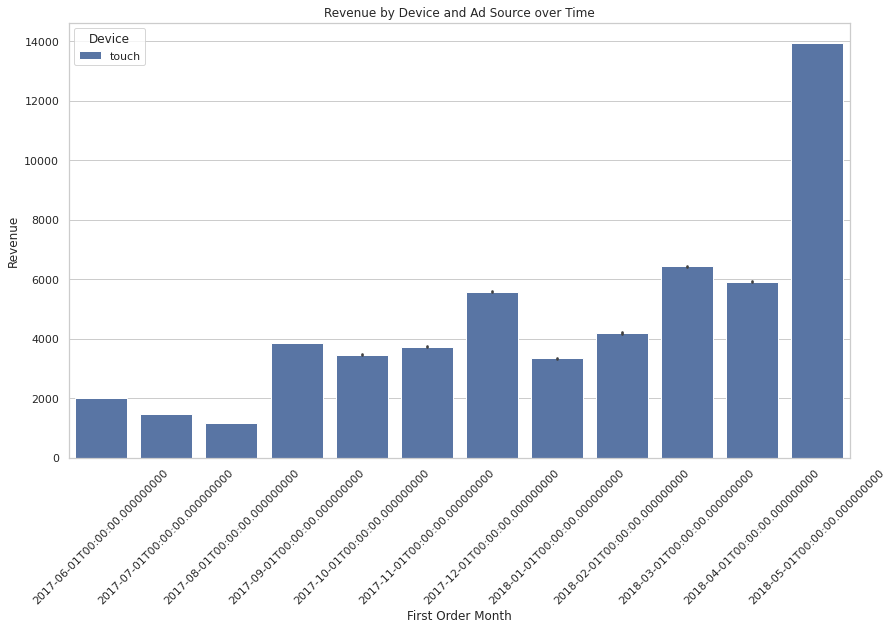

In [115]:

# Set the style for seaborn
sns.set(style="whitegrid")

# Create a bar plot for Revenue by Device and Ad Source over Time
plt.figure(figsize=(14, 8))
sns.barplot(x='first_order_month', y='revenue', hue='Device', data=combined_df)
plt.title('Revenue by Device and Ad Source over Time')
plt.xlabel('First Order Month')
plt.ylabel('Revenue')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

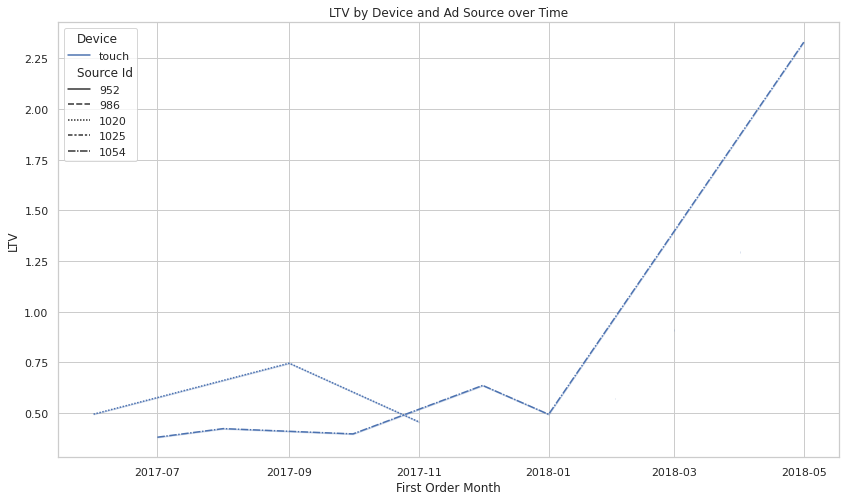

In [116]:
# Create a line plot for LTV by Device and Ad Source over Time
plt.figure(figsize=(14, 8))
sns.lineplot(x='first_order_month', y='ltv', hue='Device', style='Source Id', data=combined_df)
plt.title('LTV by Device and Ad Source over Time')
plt.xlabel('First Order Month')
plt.ylabel('LTV')
plt.show()


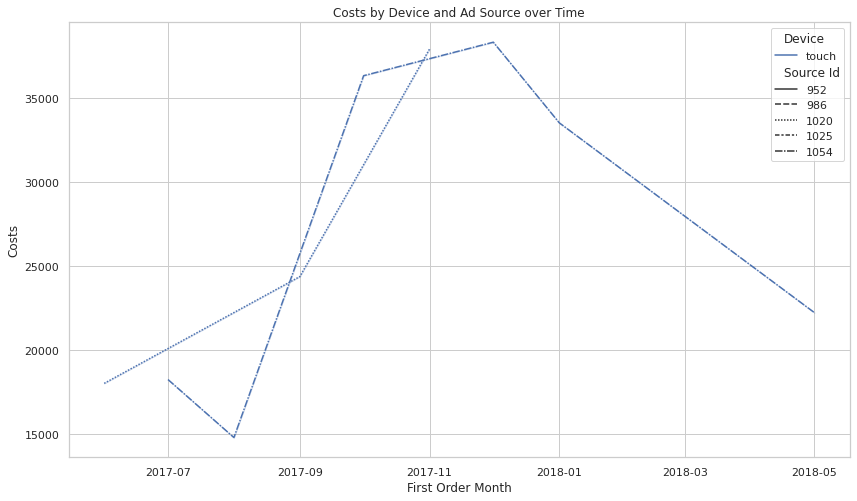

In [117]:
# Create a line plot for Costs by Device and Ad Source over Time
plt.figure(figsize=(14, 8))
sns.lineplot(x='first_order_month', y='costs', hue='Device', style='Source Id', data=combined_df)
plt.title('Costs by Device and Ad Source over Time')
plt.xlabel('First Order Month')
plt.ylabel('Costs')
plt.show()


## General Conclusion

Step 3. Write a conclusion: advise marketing experts how much money to invest and where.
What sources/platforms would you recommend? Back up your choice: what metrics did you focus on? Why? What conclusions did you draw after finding the metric values?

**Revenue and Gross Profit (GP) Analysis:**
>Focus on sources and platforms that consistently generate high revenue and gross profit.

>Identify sources with the highest Return on Marketing Investment (ROMI), where ROMI is calculated as GP/Customer Acquisition Cost (CAC).

>Allocate a significant portion of the budget to sources with the highest ROMI.

**Customer Acquisition Cost (CAC) and Lifetime Value (LTV):**
>Monitor and manage CAC to ensure it remains within acceptable limits. If CAC is too high, it may be necessary to reevaluate marketing strategies for specific sources.

>Consider sources with a higher LTV-to-CAC ratio, as this indicates a better balance between acquiring customers and the long-term value they bring.

**Platform and Device Considerations:**
>Evaluate the performance of different devices and platforms. If certain platforms consistently outperform others, consider reallocating resources accordingly.

>Take note of the user behavior on different devices. If one device type tends to bring in more valuable customers, adjust marketing strategies accordingly.

**Time-based Analysis:**
>Consider the seasonality and temporal trends in user behavior. Allocate more resources to sources and platforms that perform well during peak times.

>Analyze the impact of marketing initiatives over time and identify any seasonality patterns to optimize budget allocation.
